In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Nutritional values for the food items
nutritional_values = {
    "AW cola": {"kalori": 150, "protein": 0, "lemak": 0, "karbohidrat": 40, "serat": 0, "vitamin_C": 0, "kalsium": 0},
    "Beijing Beef": {"kalori": 470, "protein": 19, "lemak": 25, "karbohidrat": 41, "serat": 2, "vitamin_C": 0, "kalsium": 0},
    "Chow Mein": {"kalori": 510, "protein": 14, "lemak": 20, "karbohidrat": 70, "serat": 4, "vitamin_C": 1, "kalsium": 30},
    "Fried Rice": {"kalori": 520, "protein": 11, "lemak": 16, "karbohidrat": 85, "serat": 3, "vitamin_C": 1, "kalsium": 20},
    "Hashbrown": {"kalori": 150, "protein": 1, "lemak": 10, "karbohidrat": 15, "serat": 2, "vitamin_C": 0, "kalsium": 0},
    "Honey Walnut Shrimp": {"kalori": 360, "protein": 13, "lemak": 23, "karbohidrat": 28, "serat": 1, "vitamin_C": 2, "kalsium": 40},
    "Kung Pao Chicken": {"kalori": 290, "protein": 14, "lemak": 19, "karbohidrat": 13, "serat": 3, "vitamin_C": 8, "kalsium": 20},
    "String Bean Chicken Breast": {"kalori": 190, "protein": 14, "lemak": 9, "karbohidrat": 12, "serat": 4, "vitamin_C": 15, "kalsium": 40},
    "Super Greens": {"kalori": 90, "protein": 6, "lemak": 5, "karbohidrat": 7, "serat": 5, "vitamin_C": 60, "kalsium": 70},
    "The Original Orange Chicken": {"kalori": 490, "protein": 13, "lemak": 23, "karbohidrat": 51, "serat": 2, "vitamin_C": 0, "kalsium": 20},
    "White Steamed Rice": {"kalori": 380, "protein": 7, "lemak": 0, "karbohidrat": 86, "serat": 1, "vitamin_C": 0, "kalsium": 0},
    "Black Pepper Rice Bowl": {"kalori": 420, "protein": 15, "lemak": 10, "karbohidrat": 62, "serat": 2, "vitamin_C": 0, "kalsium": 0},
    "Burger": {"kalori": 530, "protein": 21, "lemak": 27, "karbohidrat": 50, "serat": 2, "vitamin_C": 1, "kalsium": 100},
    "Carrot Eggs": {"kalori": 180, "protein": 8, "lemak": 12, "karbohidrat": 10, "serat": 3, "vitamin_C": 4, "kalsium": 50},
    "Cheese Burger": {"kalori": 600, "protein": 23, "lemak": 33, "karbohidrat": 55, "serat": 3, "vitamin_C": 1, "kalsium": 150},
    "Chicken Waffle": {"kalori": 400, "protein": 17, "lemak": 23, "karbohidrat": 30, "serat": 2, "vitamin_C": 0, "kalsium": 60},
    "Chicken Nuggets": {"kalori": 290, "protein": 15, "lemak": 19, "karbohidrat": 16, "serat": 1, "vitamin_C": 0, "kalsium": 10},
    "Chinese Cabbage": {"kalori": 20, "protein": 1, "lemak": 0, "karbohidrat": 4, "serat": 2, "vitamin_C": 45, "kalsium": 40},
    "Chinese Sausage": {"kalori": 340, "protein": 10, "lemak": 25, "karbohidrat": 17, "serat": 1, "vitamin_C": 0, "kalsium": 15},
    "Crispy Corn": {"kalori": 200, "protein": 3, "lemak": 12, "karbohidrat": 25, "serat": 2, "vitamin_C": 6, "kalsium": 10},
    "Curry": {"kalori": 300, "protein": 10, "lemak": 20, "karbohidrat": 20, "serat": 4, "vitamin_C": 10, "kalsium": 30},
    "French Fries": {"kalori": 380, "protein": 4, "lemak": 18, "karbohidrat": 50, "serat": 4, "vitamin_C": 6, "kalsium": 15},
    "Fried Chicken": {"kalori": 430, "protein": 24, "lemak": 25, "karbohidrat": 20, "serat": 2, "vitamin_C": 0, "kalsium": 30},
    "Fried Dumplings": {"kalori": 230, "protein": 10, "lemak": 12, "karbohidrat": 20, "serat": 1, "vitamin_C": 1, "kalsium": 20},
    "Fried Eggs": {"kalori": 100, "protein": 7, "lemak": 8, "karbohidrat": 1, "serat": 0, "vitamin_C": 0, "kalsium": 20},
    "Mango Chicken Pocket": {"kalori": 400, "protein": 15, "lemak": 18, "karbohidrat": 50, "serat": 4, "vitamin_C": 30, "kalsium": 40},
    "Mozza Burger": {"kalori": 600, "protein": 28, "lemak": 35, "karbohidrat": 45, "serat": 2, "vitamin_C": 1, "kalsium": 200},
    "Mung Bean Sprouts": {"kalori": 31, "protein": 3, "lemak": 0.2, "karbohidrat": 6, "serat": 2, "vitamin_C": 13, "kalsium": 14},
    "Nugget": {"kalori": 270, "protein": 14, "lemak": 17, "karbohidrat": 15, "serat": 1, "vitamin_C": 0, "kalsium": 10},
    "Perkedel": {"kalori": 200, "protein": 4, "lemak": 12, "karbohidrat": 20, "serat": 2, "vitamin_C": 0, "kalsium": 20},
    "Rice": {"kalori": 130, "protein": 2.5, "lemak": 0.3, "karbohidrat": 28, "serat": 0.3, "vitamin_C": 0, "kalsium": 3},
    "Sprite": {"kalori": 140, "protein": 0, "lemak": 0, "karbohidrat": 38, "serat": 0, "vitamin_C": 0, "kalsium": 0},
    "Tostitos Cheese Dip Sauce": {"kalori": 60, "protein": 1, "lemak": 4, "karbohidrat": 2, "serat": 0, "vitamin_C": 0, "kalsium": 40},
    "Triangle Hash Brown": {"kalori": 150, "protein": 1, "lemak": 10, "karbohidrat": 15, "serat": 2, "vitamin_C": 0, "kalsium": 0},
    "Water Spinach": {"kalori": 40, "protein": 3, "lemak": 0.5, "karbohidrat": 8, "serat": 2.5, "vitamin_C": 50, "kalsium": 30}
}

food_classes = list(nutritional_values.keys())  # Food labels (classes)
num_classes = len(food_classes)

# Function to calculate BMR based on user data
def calculate_bmr(age, weight, height, gender):
    if gender == 'male':
        return 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        return 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)

# Function to calculate TDEE based on BMR and activity level
def calculate_tdee(bmr, activity_level):
    return bmr * activity_level

# Generate dummy user data and food history
def create_user_food_dataset(num_samples=1000):
    user_data = {
        "user_age": np.arange(20, 60),
        "user_weight": np.arange(50, 100),
        "user_height": np.arange(150, 200),
        "user_gender": ["male", "female"],
        "activity_level": [1.2, 1.375, 1.55, 1.725, 1.9]
    }

    data = []
    labels = []
    for _ in range(num_samples):
        # Random user attributes
        age = np.random.choice(user_data["user_age"])
        weight = np.random.choice(user_data["user_weight"])
        height = np.random.choice(user_data["user_height"])
        gender = np.random.choice(user_data["user_gender"])
        activity_level = np.random.choice(user_data["activity_level"])

        # Calculate BMR and TDEE
        bmr = calculate_bmr(age, weight, height, gender)
        tdee = calculate_tdee(bmr, activity_level)

        # Select random food and get its nutritional values
        food_choice = np.random.choice(food_classes)
        nutrition = nutritional_values[food_choice]

        # Create feature vector: age, weight, height, activity, BMR, TDEE + nutritional values of consumed food
        data.append([
            age, weight, height, activity_level, bmr, tdee,
            nutrition["kalori"], nutrition["protein"], nutrition["lemak"], 
            nutrition["karbohidrat"], nutrition["serat"], nutrition["vitamin_C"], nutrition["kalsium"]
        ])

        # Food class (label)
        labels.append(food_classes.index(food_choice))

    return np.array(data), np.array(labels)

# Generate dataset
X, y = create_user_food_dataset()

# Normalize dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [2]:
class ComplexDailyIntakeMemory:
    def __init__(self, target_calories, target_protein, target_fat, target_carbs, target_fiber, target_vitamin_C, target_calcium):
        self.target_calories = target_calories
        self.target_protein = target_protein
        self.target_fat = target_fat
        self.target_carbs = target_carbs
        self.target_fiber = target_fiber
        self.target_vitamin_C = target_vitamin_C
        self.target_calcium = target_calcium
        self.consumed_calories = 0
        self.consumed_protein = 0
        self.consumed_fat = 0
        self.consumed_carbs = 0
        self.consumed_fiber = 0
        self.consumed_vitamin_C = 0
        self.consumed_calcium = 0

    def add_food(self, food_name, food_weight):
        if food_name in nutritional_values:
            nutrisi = nutritional_values[food_name]
            self.consumed_calories += (nutrisi["kalori"] / 100) * food_weight
            self.consumed_protein += (nutrisi["protein"] / 100) * food_weight
            self.consumed_fat += (nutrisi["lemak"] / 100) * food_weight
            self.consumed_carbs += (nutrisi["karbohidrat"] / 100) * food_weight
            self.consumed_fiber += (nutrisi.get("serat", 0) / 100) * food_weight
            self.consumed_vitamin_C += (nutrisi.get("vitamin_C", 0) / 100) * food_weight
            self.consumed_calcium += (nutrisi.get("kalsium", 0) / 100) * food_weight

    def remaining_intake(self):
        return {
            "remaining_calories": self.target_calories - self.consumed_calories,
            "remaining_protein": self.target_protein - self.consumed_protein,
            "remaining_fat": self.target_fat - self.consumed_fat,
            "remaining_carbs": self.target_carbs - self.consumed_carbs,
            "remaining_fiber": self.target_fiber - self.consumed_fiber,
            "remaining_vitamin_C": self.target_vitamin_C - self.consumed_vitamin_C,
            "remaining_calcium": self.target_calcium - self.consumed_calcium
        }

class FoodRecommendationFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FoodRecommendationFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.fc3(x)
        return out

# Initialize model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
model = FoodRecommendationFNN(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [3]:
import matplotlib.pyplot as plt
import torch

def train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs=100):
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Testing phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())
            
            # Calculate test accuracy
            _, predicted = torch.max(test_outputs, 1)
            correct = (predicted == y_test).sum().item()
            accuracy = 100 * correct / y_test.size(0)
            test_accuracies.append(accuracy)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy:.2f}%")
    
    return train_losses, test_losses, test_accuracies


In [4]:
def plot_training_progress(train_losses, test_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plotting training and test losses
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Testing Loss over Epochs')
    plt.legend()

    # Plotting test accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch [10/100], Train Loss: 3.4827, Test Loss: 3.4885, Test Accuracy: 6.00%
Epoch [20/100], Train Loss: 3.3554, Test Loss: 3.3844, Test Accuracy: 9.50%
Epoch [30/100], Train Loss: 3.1363, Test Loss: 3.1790, Test Accuracy: 24.50%
Epoch [40/100], Train Loss: 2.8091, Test Loss: 2.8602, Test Accuracy: 36.50%
Epoch [50/100], Train Loss: 2.4220, Test Loss: 2.4795, Test Accuracy: 45.00%
Epoch [60/100], Train Loss: 2.0271, Test Loss: 2.0852, Test Accuracy: 53.00%
Epoch [70/100], Train Loss: 1.6644, Test Loss: 1.7219, Test Accuracy: 58.50%
Epoch [80/100], Train Loss: 1.3572, Test Loss: 1.4128, Test Accuracy: 67.50%
Epoch [90/100], Train Loss: 1.1086, Test Loss: 1.1686, Test Accuracy: 76.50%
Epoch [100/100], Train Loss: 0.9099, Test Loss: 0.9741, Test Accuracy: 82.50%


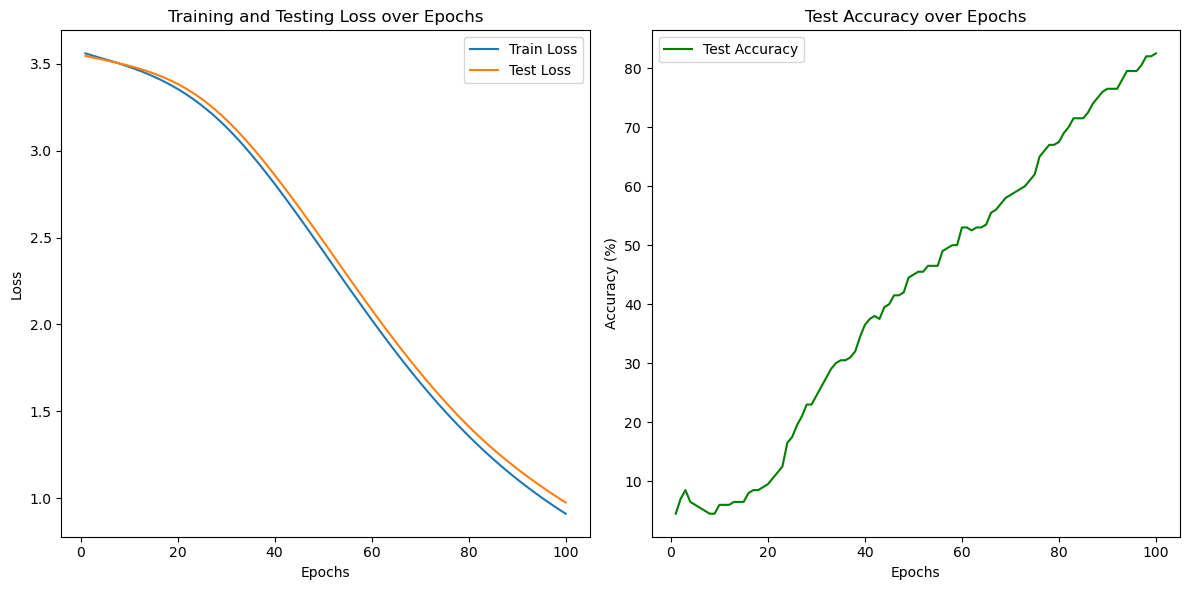

In [5]:
# Train the model and get losses and accuracies
train_losses, test_losses, test_accuracies = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, num_epochs=100)

# Visualize the progress
plot_training_progress(train_losses, test_losses, test_accuracies)


In [10]:
# Save the trained model
torch.save(model.state_dict(), 'food_recommendation_fnn.pth')
print("Model saved successfully!")


Model saved successfully!


In [11]:
# Load the saved model
loaded_model = FoodRecommendationFNN(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
loaded_model.load_state_dict(torch.load('food_recommendation_fnn.pth'))
loaded_model.eval()  # Set the model to evaluation mode

# Contoh data pengguna baru untuk prediksi
new_user_data = np.array([[35, 75, 175, 1.55, 1600, 2500, 470, 19, 25, 41, 2, 0, 0]])  # Age, weight, height, activity, BMR, TDEE, and consumed nutrition
new_user_data_scaled = scaler.transform(new_user_data)  # Normalize input
new_user_data_tensor = torch.tensor(new_user_data_scaled, dtype=torch.float32)

# Perform prediction
with torch.no_grad():
    prediction = loaded_model(new_user_data_tensor)
    predicted_class = torch.argmax(prediction, dim=1).item()

# Print the predicted food class
print(f"Predicted food: {food_classes[predicted_class]}")


Predicted food: Beijing Beef
